    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  
Age                                 33.0
Gender                            Female
Education Level                 Master's
Job Title              Marketing Manager
Years of Experience                  7.0
Salary                           90000.0
Salary (in USD)                     50.0
Name: 16, dtype: object
Age                                         38.0
Gender                                    Female
Education Level                         Master's
Job Tit

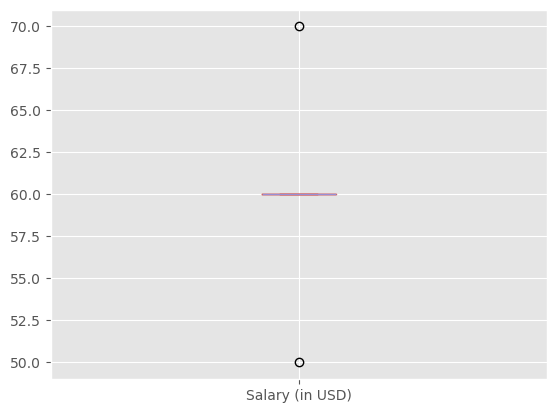

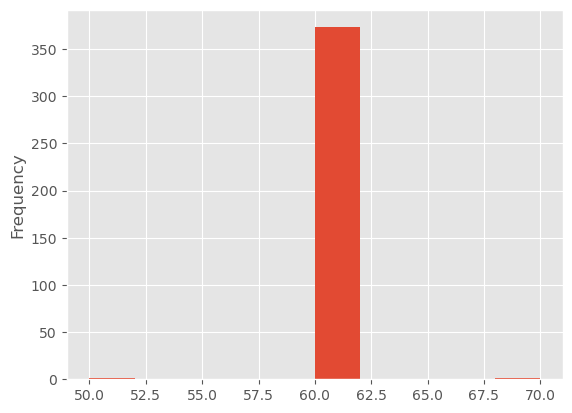

Minimum salary: 50.0
Maximum salary: 70.0


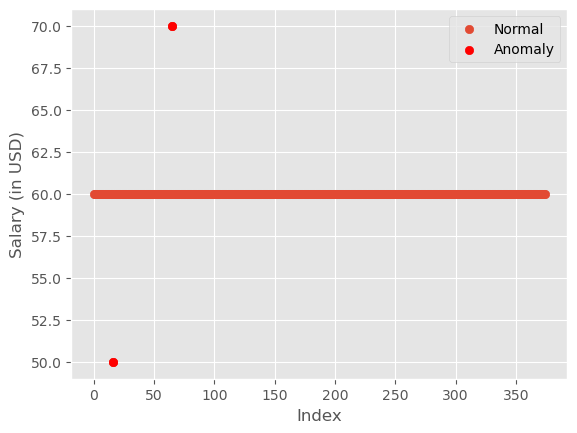

Anomalies detected:
     Age  Gender Education Level                  Job Title  \
16  33.0  Female        Master's          Marketing Manager   
65  38.0  Female        Master's  Digital Marketing Manager   

    Years of Experience   Salary  Salary (in USD)  anomaly  
16                  7.0  90000.0             50.0       -1  
65                 10.0  90000.0             70.0       -1  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer

# Set the plot style
plt.style.use('ggplot')

# Load the dataset
salary_df = pd.read_csv('Salary Data.csv')

# Display the first few rows of the dataset
print(salary_df.head())

# Introduce significant anomalies for demonstration purposes
salary_df.at[16, 'Salary (in USD)'] = 50  # Assuming normal range is between 1000 and 2500
salary_df.at[65, 'Salary (in USD)'] = 70

# Display the rows with the introduced anomalies
print(salary_df.loc[16])
print(salary_df.loc[65])

# Handle missing values by imputing with the median
imputer = SimpleImputer(strategy='median')
salary_df['Salary (in USD)'] = imputer.fit_transform(salary_df[['Salary (in USD)']])

# Plot the salary data as a box plot
salary_df['Salary (in USD)'].plot(kind='box')
plt.show()

# Plot the salary data as a histogram
salary_df['Salary (in USD)'].plot(kind='hist')
plt.show()

# Print the minimum and maximum salary
print('Minimum salary: ' + str(salary_df['Salary (in USD)'].min()))
print('Maximum salary: ' + str(salary_df['Salary (in USD)'].max()))

# Machine Learning Model for Anomaly Detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)
salary_df['anomaly'] = iso_forest.fit_predict(salary_df[['Salary (in USD)']].values)

# Plotting anomalies
anomalies = salary_df[salary_df['anomaly'] == -1]
plt.scatter(salary_df.index, salary_df['Salary (in USD)'], label='Normal')
plt.scatter(anomalies.index, anomalies['Salary (in USD)'], color='red', label='Anomaly')
plt.xlabel('Index')
plt.ylabel('Salary (in USD)')
plt.legend()
plt.show()

# Display the anomalies
print("Anomalies detected:")
print(anomalies)